# Exploratory CTR Data Analysis

This chapter provides the foundations for exploratory data analysis (EDA). Using sample data you’ll use the pandas library to look at columns and data types, explore missing data, and use hashing to perform feature engineering on categorical features. All of which are important when exploring features for more accurate CTR prediction.

In [2]:
# Import data
from pandas import read_pickle
df = read_pickle("data/data_ch2.pkl")

# Print columns
print(df.columns)

# Print data types of columns
print(df.dtypes)

# Select and print numeric columns
numeric_df = df.select_dtypes(include=['int', 'float'])
print(numeric_df.columns)

# Select and print categorical columns 
categorical_df = df.select_dtypes(include=['object'])
print(categorical_df.columns)

Index(['advertiser_type', 'app_category', 'app_domain', 'app_id', 'banner_pos',
       'click', 'device_conn_type', 'device_id', 'device_ip', 'device_model',
       'device_type', 'hour', 'id', 'product_type', 'search_engine_type',
       'site_category', 'site_domain', 'site_id'],
      dtype='object')
advertiser_type        int64
app_category          object
app_domain            object
app_id                object
banner_pos             int64
click                  int64
device_conn_type       int64
device_id             object
device_ip             object
device_model          object
device_type            int64
hour                   int64
id                    uint64
product_type           int64
search_engine_type     int64
site_category         object
site_domain           object
site_id               object
dtype: object
Index(['advertiser_type', 'banner_pos', 'click', 'device_conn_type',
       'device_type', 'hour', 'product_type', 'search_engine_type'],
      dtype='object')

# Checking for missing values

Identifying missing values is important for analysis. Using the same dataset, you will get the total number of missing values by iterating over both rows and columns within the dataset. Subject to finding missing values, further methods are needed to handle such values, such as using Imputer from sklearn. Missing values need to be handled, otherwise it will be difficult to conduct proper CTR prediction.

In [3]:
# Print info
print(df.info())

# Print missing values by column 
print(df.isnull().sum(axis = 0))

# Print total number of missing values in rows
print(df.isnull().sum(axis = 1).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 18 columns):
advertiser_type       500 non-null int64
app_category          500 non-null object
app_domain            500 non-null object
app_id                500 non-null object
banner_pos            500 non-null int64
click                 500 non-null int64
device_conn_type      500 non-null int64
device_id             500 non-null object
device_ip             500 non-null object
device_model          500 non-null object
device_type           500 non-null int64
hour                  500 non-null int64
id                    500 non-null uint64
product_type          500 non-null int64
search_engine_type    500 non-null int64
site_category         500 non-null object
site_domain           500 non-null object
site_id               500 non-null object
dtypes: int64(8), object(9), uint64(1)
memory usage: 70.4+ KB
None
advertiser_type       0
app_category          0
app_domain            0
app_id  

# Distributions by CTR
For any individual feature, it is useful to look at both the distribution of a feature, as well as how it varies with the variable of interest. In this exercise, you will explore the search_engine_type feature, which represents an integer denoting the search engine, such as Google or Bing, by which the user expressed intent leading up to ad. Due to privacy reasons, these categories are anonymous. First you will construct and look at the distribution of search_engine_type. Then you will look at how CTR varies based on search_engine_type value, similar to how you looked at CTR breakdown by device type and banner position in the previous chapter.

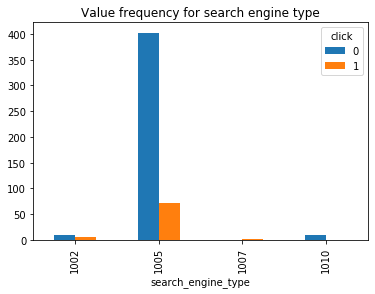

click  search_engine_type  clicks  total       CTR
0                    1002     5.0   14.0  0.357143
1                    1005    72.0  475.0  0.151579
2                    1007     1.0    NaN       NaN
3                    1010     NaN    NaN       NaN


In [7]:
# Construct bar chart for clicks by search engine type
se_df = df.groupby(['search_engine_type', 'click']).size().unstack()
se_df.plot(kind = 'bar', title = 'Value frequency for search engine type')
plt.show()

# Reset index and rename columns
se_df = se_df.reset_index()
se_df.rename(columns = {0: 'non_clicks', 1: 'clicks'}, inplace = True)

# Compute CTR using clicks and non clicks
se_df['total'] = se_df['clicks'] + se_df['non_clicks']
se_df['CTR'] = se_df['clicks'] / se_df['total']

# Print CTR by search engine type
print(se_df[['search_engine_type', 'clicks', 'total', 'CTR']])

Note the most of the search engine type values are one particular value (category 1005) - which may represent Google. Also, it appears that CTR varies by search engine type value (highest for the category 1002), similar to the case with device type and banner position values. Therefore, it is likely useful for predicting CTR and should be included in future prediction models.

# Analyzing datetime columns
Feature engineering is an important step in all machine learning workflows in order to process features from different data types. In particular, datetime columns are common in many datasets. In this exercise, you will explore the hour column in the dataset, which is stored as an integer but represents a datetime. First you will parse the hour column to convert it into a datetime column. Then you will extract the hour of the day from that datetime column, and calculate the total number of clicks based on that hour of the day.

   advertiser_type app_category app_domain    app_id  banner_pos  click  \
0               48     0f2161f8   2347f47a  f0d41ff1           0      0   
1               79     07d7df22   7801e8d9  ecad2386           0      0   
2               79     07d7df22   7801e8d9  ecad2386           0      0   
3               79     07d7df22   7801e8d9  ecad2386           1      0   
4              157     0f2161f8   2347f47a  5e3f096f           0      0   

   device_conn_type device_id device_ip device_model  device_type  \
0                 0  a99f214a  99f6dbf7     58202c40            1   
1                 2  a99f214a  95b2935e     8d19d3d4            1   
2                 0  a99f214a  431b3174     c4cff2ea            1   
3                 0  a99f214a  aa163d04     8a4875bd            1   
4                 0  a99f214a  d2f6e793     1610002a            1   

                 hour                    id  product_type  search_engine_type  \
0 2014-10-21 02:00:00  13124278056745303300          

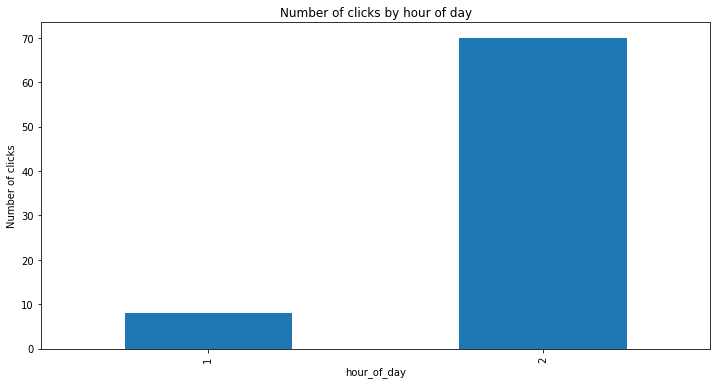

In [8]:
from pandas import to_datetime

# Change the hour column to a datetime and extract hour of day
df['hour'] = to_datetime(df['hour'], format = '%y%m%d%H')
df['hour_of_day'] = df['hour'].dt.hour
print(df.head(5))

# Get and plot total clicks by hour of day
df.groupby('hour_of_day')['click'].sum().plot.bar(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by hour of day')
plt.show()

# Converting categorical variables
Because sklearn requires numerical features as inputs for models, it is important to encode categorical variables into numerical ones. The most common technique, called "one-hot encoding", is straightforward but has high memory consumption. To that end, you will use the technique of hashing, which maps categorical inputs into numerical ones, for each categorical column.

In [12]:
# Get categorical columns
categorical_cols = df.select_dtypes(
  include = ['object']).columns.tolist()
print("Categorical columns: ")
print(categorical_cols)

# Iterate over categorical columns and apply hash function
for col in categorical_cols:
	df[col] = df[col].apply(lambda x: hash(x))

# Print examples of new output
print(df.head(5))

Categorical columns: 
['app_category', 'app_domain', 'app_id', 'device_id', 'device_ip', 'device_model', 'site_category', 'site_domain', 'site_id']
   advertiser_type         app_category           app_domain  \
0               48 -6331854816477907478 -1057993732622977416   
1               79  6095358548977309062  2285468481470867730   
2               79  6095358548977309062  2285468481470867730   
3               79  6095358548977309062  2285468481470867730   
4              157 -6331854816477907478 -1057993732622977416   

                app_id  banner_pos  click  device_conn_type  \
0  2300043273097231031           0      0                 0   
1 -2736973466362614021           0      0                 2   
2 -2736973466362614021           0      0                 0   
3 -2736973466362614021           1      0                 0   
4  4972981595421567469           0      0                 0   

             device_id            device_ip         device_model  device_type  \
0  4105

# Creating new features
Feature engineering includes also the actual creation of new features. Creating new features is important since the model relies on such features for prediction accuracy. In this exercise, you will check on properties of three columns which appear as integers in the data but represent categorical values. These three columns are: search_engine_type, product_type, and advertiser_type. You will create count features for those 3 columns, as well as device_id and site_id. These count features represent the number of clicks for each of those columns and will be used later on for prediction.

In [13]:
# Get counts of total and unique values for given features
feature_list = ["search_engine_type", "product_type", "advertiser_type"]
for feature in feature_list:
	print(df[feature].count())
	print(df[feature].nunique())

# Define new features as counts
new_feature_list = ['device_id', 'site_id'] + feature_list
for new_feature in new_feature_list:
  df[new_feature + '_count'] = df.groupby(
    new_feature)['click'].transform("count")
print(df.head(5))

500
4
500
24
500
23
   advertiser_type         app_category           app_domain  \
0               48 -6331854816477907478 -1057993732622977416   
1               79  6095358548977309062  2285468481470867730   
2               79  6095358548977309062  2285468481470867730   
3               79  6095358548977309062  2285468481470867730   
4              157 -6331854816477907478 -1057993732622977416   

                app_id  banner_pos  click  device_conn_type  \
0  2300043273097231031           0      0                 0   
1 -2736973466362614021           0      0                 2   
2 -2736973466362614021           0      0                 0   
3 -2736973466362614021           1      0                 0   
4  4972981595421567469           0      0                 0   

             device_id            device_ip         device_model  ...  \
0  4105829326841158888 -2002047080567455197  -668372374730861734  ...   
1  4105829326841158888  -691767878883573512  1424864932104023442  ... 

# Log normalization
Standardization is important to make sure all features are comparable. Log normalization is a common method of standardization. You will check the variance of select features and compute the overall median variance among features. The features will be the numeric ones, except for the click column, banner_pos, device_type, and columns search_engine_type, product_type, advertiser_type from last lesson since they are actually categorical columns. Then you will apply log normalization to these columns with a variance higher than the median variance and check results.

In [18]:
import numpy as np
# Select numeric columns and print median variance
num_df = df.select_dtypes(include=['int', 'float'])
filter_cols = ['click', 'banner_pos', 'device_type',
               'search_engine_type', 'product_type', 'advertiser_type']
new_df = num_df[num_df.columns[~num_df.columns.isin(filter_cols)]]
median = new_df.var().median()
print(median)

# Apply log normalization on columns with higher than median variance
change_cols = new_df.columns[new_df.var() > median].tolist()
new_df[change_cols] = new_df[change_cols].apply(
  lambda x: np.log(x))
print(new_df.var().median())

5.861013843604908e+36


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]


0.7624620829361591


# Standard scaling
Standard scaling transforms numerical features to have a mean of 0 and variance of 1. In this exercise, you will do standard scaling using StandardScaler() from sklearn. First, you will select only the relevant columns to apply scaling on, using a combination of filtering for numerical columns along with some knowledge of the columns. This filtering is already provided and will be done through the use of regular expressions, which allows for partial string matches. Then you will use fit_transform() to transform the relevant columns.

In [19]:
from sklearn.preprocessing import StandardScaler

# Get non-categorical columns, with a filter
num_df = df.select_dtypes(include=['int', 'float'])
filter_cols = ['click', 'banner_pos', 'device_type',
               'search_engine_type', 'product_type', 'advertiser_type']
new_df = num_df[num_df.columns[~num_df.columns.isin(filter_cols)]]
num_cols = new_df.columns

# Transform columns using StandardScaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Print mean and variance of transformed columns
print(df[num_cols].mean())
print(df[num_cols].var())

app_category                3.064216e-17
app_domain                  9.570122e-17
app_id                      5.706546e-17
device_conn_type           -9.614531e-17
device_id                  -4.267697e-16
device_ip                   1.598721e-17
device_model                3.730349e-17
site_category              -3.019807e-17
site_domain                 4.807266e-17
site_id                     6.661338e-18
hour_of_day                 2.982059e-16
device_id_count            -1.201261e-16
site_id_count              -7.549517e-17
search_engine_type_count    2.023937e-16
product_type_count         -6.039613e-17
advertiser_type_count       1.185718e-16
dtype: float64
app_category                1.002004
app_domain                  1.002004
app_id                      1.002004
device_conn_type            1.002004
device_id                   1.002004
device_ip                   1.002004
device_model                1.002004
site_category               1.002004
site_domain                 1.002